In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt 

df = pd.read_csv("/Users/emretoner/Desktop/data1030-final/DATA1030PROJECT-TONER/data/heart.csv")
# create a new array to convert 0 values of Cholesterol feature to np.nan 
cholest = df['Cholesterol'].values
cholest = cholest.astype('float')
cholest[cholest==0] = np.nan
# convert back into a pd dataframe to append to original df
cholesterol = pd.DataFrame(cholest)
cholesterol = cholesterol.set_axis(['Cholesterol'], axis =1)
df.drop('Cholesterol',axis=1,inplace=True)
list = [cholesterol, df]
df_new = pd.concat(list, axis = 1, ignore_index = False)
df_new
X = df_new.values
print(X.shape)
# # the feature names
ftrs = df_new.columns
y = df_new['HeartDisease']
df_new.drop(columns=['HeartDisease'],inplace=True)
df_new

(918, 12)


,Cholesterol,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,289.0,40,M,ATA,140,0,Normal,172,N,0.0,Up
1,180.0,49,F,NAP,160,0,Normal,156,N,1.0,Flat
2,283.0,37,M,ATA,130,0,ST,98,N,0.0,Up
3,214.0,48,F,ASY,138,0,Normal,108,Y,1.5,Flat
4,195.0,54,M,NAP,150,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,264.0,45,M,TA,110,0,Normal,132,N,1.2,Flat
914,193.0,68,M,ASY,144,1,Normal,141,N,3.4,Flat
915,131.0,57,M,ASY,130,0,Normal,115,Y,1.2,Flat
916,236.0,57,F,ATA,130,0,LVH,174,N,0.0,Flat


In [66]:
y.value_counts() 

1    508
0    410
Name: HeartDisease, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split 


X_other, X_test, y_other, y_test = train_test_split(df_new, y, test_size=0.2, random_state=42)
X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=42)


print(X_train.shape)
print(X_CV.shape)
print(X_test.shape)


(550, 11)
(184, 11)
(184, 11)


In [3]:
# collect the features
std_ftrs = ['Cholesterol', 'RestingBP','MaxHR', 'Oldpeak', 'Age']
onehot_ftrs = ['Sex', 'FastingBS', 'ST_Slope', 'ExerciseAngina', 'RestingECG']
ordinal_ftrs = ['ChestPainType']
ordinal_cats = [['ASY', 'NAP', 'ATA', 'TA']]


In [250]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# one-hot encoder
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# ordinal encoder
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
standard_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])



preprocessor = ColumnTransformer(transformers=[
        ('std', standard_transformer, std_ftrs),
        ('onehot', onehot_transformer, onehot_ftrs),
        ('ordinal', ordinal_transformer, ordinal_ftrs)])

# clf = Pipeline(steps=[('preprocessor', preprocessor)]) 
X_prep = preprocessor.fit_transform(X_train)

feature_names = preprocessor.transformers_[0][-1] + \
               preprocessor.named_transformers_['onehot'][0].get_feature_names(onehot_ftrs).tolist() + \
                preprocessor.transformers_[2][-1]


df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_CV = preprocessor.transform(X_CV)
df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
print(df_CV.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)

df_test.columns
file = open('/Users/emretoner/Desktop/data1030-final/DATA1030PROJECT-TONER/data/preprocessed.save', 'wb')
pickle.dump((feature_names, df_train, df_CV, df_test),file)
file.close()

(550, 18)
(184, 18)
(184, 18)


In [10]:
mask = df_test[['Cholesterol', 'RestingBP', 'MaxHR', 'Oldpeak', 'Age', 'Sex_F', 'Sex_M',
       'FastingBS_0', 'FastingBS_1', 'ST_Slope_Down', 'ST_Slope_Flat',
       'ST_Slope_Up', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ChestPainType']].isnull()
print(mask)

unique_rows, counts = np.unique(mask, axis=0,return_counts=True)
print(unique_rows.shape)
for i in range(len(counts)):
    print(unique_rows[i],counts[i])

     Cholesterol  RestingBP  MaxHR  Oldpeak    Age  Sex_F  Sex_M  FastingBS_0  \
0           True      False  False    False  False  False  False        False   
1          False      False  False    False  False  False  False        False   
2           True      False  False    False  False  False  False        False   
3           True      False  False    False  False  False  False        False   
4          False      False  False    False  False  False  False        False   
..           ...        ...    ...      ...    ...    ...    ...          ...   
179        False      False  False    False  False  False  False        False   
180         True      False  False    False  False  False  False        False   
181        False      False  False    False  False  False  False        False   
182        False      False  False    False  False  False  False        False   
183         True      False  False    False  False  False  False        False   

     FastingBS_1  ST_Slope_

 <b>XGBoost</b>

In [199]:
print(range (2, 10, 1))

range(2, 10)


In [242]:
# save the output so I can use it later
import pickle
import xgboost
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split 

nr_state = 10
accuracy_scores = []
y_test_vals = []
all_y_test_vals = []
auc_curve = []
param_grid = {'max_depth': range (2, 10, 1),
                  'n_estimators': range(60, 220, 40),
                  'learning_rate': [0.1, 0.01, 0.05]}
pg = ParameterGrid(param_grid)
train_scores = np.zeros(len(pg))
valid_scores = np.zeros(len(pg))
test_scores = np.zeros(len(pg))

def XGB_model(X_train, Y_train, X_CV, y_CV, X_test, y_test, verbose=1):

    # make into row vectors to avoid an obnoxious sklearn warning
    Y_train = np.reshape(np.array(Y_train), (1, -1)).ravel()
    y_CV = np.reshape(np.array(y_CV), (1, -1)).ravel()
    y_test = np.reshape(np.array(y_test), (1, -1)).ravel()

    clf = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=1)     # initialize XGB
    param_grid = {'max_depth': range (2, 10, 1),
                  'n_estimators': range(60, 220, 40),
                  'learning_rate': [0.1, 0.01, 0.05]}

    pg = ParameterGrid(param_grid)

    train_scores = np.zeros(len(pg))
    valid_scores = np.zeros(len(pg))
    test_scores = np.zeros(len(pg))

    for i in range(len(pg)):
        params = pg[i]
        if verbose >= 5:
            print("Param set " + str(i + 1) + " / " + str(len(pg)))
        clf.set_params(**params)
        clf.fit(X_train, Y_train)
        y_CV_pred = clf.predict(X_CV)
        y_test_pred = clf.predict(X_test)
        train_scores[i] = clf.score(X_train, Y_train)
        valid_scores[i] = accuracy_score(y_CV, y_CV_pred)
        test_scores[i] = accuracy_score(y_test, y_test_pred)
        
#         print(f"Train Score: {train_scores[i]}:Validation Score: {valid_scores[i]}:Test Score: {test_scores[i]}")

    best_params = np.array(pg)[valid_scores == np.max(valid_scores)]
#         print(np.max(valid_scores), best_params[0])

    # test the model on the test set with best parameter set
    clf.set_params(**best_params[0])
    clf.fit(X_train, Y_train)
    y_test_pred = clf.predict(X_test)
    param_test = accuracy_score(y_test, y_test_pred)
#     print("Test Score with Best Parameter:", param_test)

    return (accuracy_score(y_test,y_test_pred), y_test_pred)

# all the inputs need to be pandas DataFrame
def reduced_feature5(X_train, Y_train, X_CV, y_CV, X_test, y_test, feature_names):
    X_train = pd.DataFrame(data=X_train, columns=feature_names)
    X_CV = pd.DataFrame(data=X_CV, columns=feature_names)
    X_test = pd.DataFrame(data=X_test, columns=feature_names)
    Y_train = pd.DataFrame(data=Y_train)
    y_test = pd.Series(y_test)
    # find all unique patterns of missing value in test set
    mask = X_test.isnull()
    unique_rows = np.array(np.unique(mask, axis=0))
    all_y_test_pred = pd.DataFrame()
    
#     print('there are', len(unique_rows), 'unique missing value patterns.')
    
    # divide test sets into subgroups according to the unique patterns
    for i in range(len(unique_rows)):
#         print ('working on unique pattern', i)
        ## generate X_test subset that matches the unique pattern i
        sub_X_test = pd.DataFrame()
        sub_y_test = pd.Series(dtype=int)
        for j in range(len(mask)): # check each row in mask
            row_mask = np.array(mask.iloc[j])
            if np.array_equal(row_mask, unique_rows[i]): # if the pattern matches the ith unique pattern
                sub_X_test = sub_X_test.append(X_test.iloc[j])# append the according X_test row j to the subset
                sub_y_test = sub_y_test.append(y_test.iloc[[j]])# append the according y_test row j
        sub_X_test = sub_X_test[X_test.columns[~unique_rows[i]]]
        
        ## choose the according reduced features for subgroups
        sub_X_train = pd.DataFrame()
        sub_Y_train = pd.DataFrame()
        sub_X_CV = pd.DataFrame()
        sub_y_CV = pd.DataFrame()
        # 1.cut the feature columns that have nans in the according sub_X_test
        sub_X_train = X_train[X_train.columns[~unique_rows[i]]]
        sub_X_CV = X_CV[X_CV.columns[~unique_rows[i]]]
        # 2.cut the rows in the sub_X_train and sub_X_CV that have any nans
        sub_X_train = sub_X_train.dropna()
        sub_X_CV = sub_X_CV.dropna()   
        # 3.cut the sub_Y_train and sub_y_CV accordingly
        sub_Y_train = Y_train.iloc[sub_X_train.index]
        sub_y_CV = y_CV.iloc[sub_X_CV.index]
        
        # run log_reg
        sub_y_test_pred = XGB_model(sub_X_train, sub_Y_train, sub_X_CV, 
                                       sub_y_CV, sub_X_test, sub_y_test, verbose=2)
        sub_y_test_pred = pd.DataFrame(sub_y_test_pred[1],columns=['sub_y_test_pred'],
                                          index=sub_y_test.index)
        # collect the test predictions
        all_y_test_pred = all_y_test_pred.append(sub_y_test_pred)
    # rank the final y_test_pred according to original y_test index
    all_y_test_pred = all_y_test_pred.sort_index()
    y_test = y_test.sort_index()
               
    # get global RMSE
    total_accuracy =  accuracy_score(y_test,all_y_test_pred)
        
    ROC = roc_auc_score(y_test,all_y_test_pred)
#     print("total ROC AUC:", ROC)
    return total_accuracy, y_test, all_y_test_pred, ROC

def pipeline_random5():
    for i in range(nr_state):
        onehot_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

        # ordinal encoder
        ordinal_transformer = Pipeline(steps=[
        ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

        # standard scaler
        standard_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
        X_other, X_test, y_other, y_test = train_test_split(df_new, y, test_size=0.2, random_state=15*i)
        X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=15*i)
        preprocessor = ColumnTransformer(transformers=[
                        ('std', standard_transformer, std_ftrs),
                        ('onehot', onehot_transformer, onehot_ftrs),
                        ('ordinal', ordinal_transformer, ordinal_ftrs)])

        X_prep = preprocessor.fit_transform(X_train)
    

        feature_names = preprocessor.transformers_[0][-1] + \
                        preprocessor.named_transformers_['onehot'][0].get_feature_names(onehot_ftrs).tolist() + \
                preprocessor.transformers_[2][-1]
        df_train = pd.DataFrame(data=X_prep,columns=feature_names)
#         print(df_train.shape)

        # transform the CV
        df_CV = preprocessor.transform(X_CV)
        df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
#         print(df_CV.shape)

        # transform the test
        df_test = preprocessor.transform(X_test)
        df_test = pd.DataFrame(data=df_test,columns = feature_names)
#         print(df_test.shape)
        rf = reduced_feature5(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[0]
        accuracy_scores.append(rf)
        yv = reduced_feature5(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[1]
        y_test_vals.append(yv)
        at = reduced_feature5(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[2]
        all_y_test_vals.append(at)
        roc = reduced_feature5(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[3]
        auc_curve.append(roc)
        
    return accuracy_scores, y_test_vals, all_y_test_vals, auc_curve
average_accuracy = np.mean(np.array(pipeline_random5()[0]))
print("Accuracy", average_accuracy)
std_accuracy = np.std(np.array(pipeline_random5()[0]))
print("SD", std_accuracy)

file = open('/Users/emretoner/Desktop/data1030-final/DATA1030PROJECT-TONER/results/xgb.save', 'wb')
pickle.dump((average_accuracy, std_accuracy),file)
file.close()

Accuracy 0.8576086956521738
SD 0.021982335234952934


In [ ]:
# collect the features
std_ftrs = ['Cholesterol', 'RestingBP','MaxHR', 'Oldpeak', 'Age']
onehot_ftrs = ['Sex', 'FastingBS', 'ST_Slope', 'ExerciseAngina', 'RestingECG']
ordinal_ftrs = ['ChestPainType']
ordinal_cats = [['ASY', 'NAP', 'ATA', 'TA']]


# one-hot encoder
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# ordinal encoder
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
standard_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


In [246]:
"L1 PENALTY LOGREG"


from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split 

nr_state = 10
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
pg = ParameterGrid(param_grid)
train_scores = np.zeros(len(pg))
valid_scores = np.zeros(len(pg))
test_scores = np.zeros(len(pg))



def logreg_model1(X_train1, Y_train1, X_CV1, y_CV1, X_test1, y_test, verbose=1):
    # make into row vectors to avoid an obnoxious sklearn warning
    Y_train1 = np.reshape(np.array(Y_train1), (1, -1)).ravel()
    y_CV1 = np.reshape(np.array(y_CV1), (1, -1)).ravel()
    y_test = np.reshape(np.array(y_test), (1, -1)).ravel()
    
    clf = LogisticRegression(penalty='l1', solver='liblinear', random_state = 42)    # find the best parameter set

    for i in range(len(pg)):
#         if verbose >= 5:
#             print("Param set " + str(i + 1) + " / " + str(len(pg)))
        params = pg[i]
        clf.set_params(**params)
        clf.fit(X_train1, Y_train1)
        y_CV1_pred = clf.predict(X_CV1)
        y_test_pred = clf.predict(X_test1)
        train_scores[i] = clf.score(X_train1, Y_train1)
        valid_scores[i] = accuracy_score(y_CV1, y_CV1_pred)
        test_scores[i] = accuracy_score(y_test, y_test_pred)
        
#         print(f"Train Score: {train_scores[i]}:Validation Score: {valid_scores[i]}: Test Score: {test_scores[i]}")

    best_params = np.array(pg)[valid_scores == np.max(valid_scores)]
#     print('Best param:', best_params[0])
    
    # test the model on the test set with best parameter set
    clf.set_params(**best_params[0])
    clf.fit(X_train1, Y_train1)

    y_test_pred = clf.predict(X_test1)
    param_test = accuracy_score(y_test, y_test_pred)
#     print("Test Score with Best Parameter:", param_test)

    return (accuracy_score(y_test,y_test_pred), y_test_pred)

    


# all the inputs need to be pandas DataFrame
def reduced_feature3(X_train1, Y_train1, X_CV1, y_CV1, X_test1, y_test, feature_names):
    X_train1 = pd.DataFrame(data=X_train1, columns=feature_names)
    X_CV1 = pd.DataFrame(data=X_CV1, columns=feature_names)
    X_test1 = pd.DataFrame(data=X_test1, columns=feature_names)
    Y_train1 = pd.DataFrame(data=Y_train1)
    y_test = pd.Series(y_test)
    # find all unique patterns of missing value in test set
    mask = X_test1.isnull()
    unique_rows = np.array(np.unique(mask, axis=0))
    all_y_test_pred = pd.DataFrame()
    all_y_test = pd.DataFrame()
    
#     print('there are', len(unique_rows), 'unique missing value patterns.')

    # divide test sets into subgroups according to the unique patterns
    for i in range(len(unique_rows)):
#         print ('working on unique pattern', i)
        ## generate X_test1 subset that matches the unique pattern i
        sub_X_test1 = pd.DataFrame()
        sub_y_test = pd.Series(dtype=int)
        for j in range(len(mask)): # check each row in mask
            row_mask = np.array(mask.iloc[j])
            if np.array_equal(row_mask, unique_rows[i]): # if the pattern matches the ith unique pattern
                sub_X_test1 = sub_X_test1.append(X_test1.iloc[j])# append the according X_test1 row j to the subset
                sub_y_test = sub_y_test.append(y_test.iloc[[j]])# append the according y_test row j
        sub_X_test1 = sub_X_test1[X_test1.columns[~unique_rows[i]]]
        
        ## choose the according reduced features for subgroups
        sub_X_train1 = pd.DataFrame()
        sub_Y_train1 = pd.DataFrame()
        sub_X_CV1 = pd.DataFrame()
        sub_y_CV1 = pd.DataFrame()
        # 1.cut the feature columns that have nans in the according sub_X_test1
        sub_X_train1 = X_train1[X_train1.columns[~unique_rows[i]]]
        sub_X_CV1 = X_CV1[X_CV1.columns[~unique_rows[i]]]
        # 2.cut the rows in the sub_X_train1 and sub_X_CV1 that have any nans
        sub_X_train1 = sub_X_train1.dropna()
        sub_X_CV1 = sub_X_CV1.dropna()   
        # 3.cut the sub_Y_train1 and sub_y_CV1 accordingly
        sub_Y_train1 = Y_train1.iloc[sub_X_train1.index]
        sub_y_CV1 = y_CV1.iloc[sub_X_CV1.index]
        
        
        # run log_reg
        sub_y_test_pred = logreg_model1(sub_X_train1, sub_Y_train1, sub_X_CV1, 
                                       sub_y_CV1, sub_X_test1, sub_y_test, verbose=2)
        sub_y_test_pred = pd.DataFrame(sub_y_test_pred[1],columns=['sub_y_test_pred'],
                                          index=sub_y_test.index)
        # collect the test predictions
        all_y_test_pred = all_y_test_pred.append(sub_y_test_pred)
    # rank the final y_test_pred according to original y_test index
    all_y_test_pred = all_y_test_pred.sort_index()
    y_test = y_test.sort_index()
    # get global RMSE
    total_accuracy =  accuracy_score(y_test,all_y_test_pred)
    ROC = roc_auc_score(y_test,all_y_test_pred)
    return total_accuracy, y_test, all_y_test_pred, ROC

def pipeline_random3():
    accuracy_scores = []
    y_test_vals = []
    all_y_test_vals = []
    auc_curve = []
    for i in range(nr_state):
        X_other, X_test1, y_other, y_test = train_test_split(df_new, y, test_size=0.2, random_state=15*i)
        X_train1, X_CV1, Y_train1, y_CV1 = train_test_split(X_other, y_other, test_size=0.25, random_state=15*i)
        preprocessor = ColumnTransformer(transformers=[
                        ('std', standard_transformer, std_ftrs),
                        ('onehot', onehot_transformer, onehot_ftrs),
                        ('ordinal', ordinal_transformer, ordinal_ftrs)])

        X_prep = preprocessor.fit_transform(X_train1)
    

        feature_names = preprocessor.transformers_[0][-1] + \
                        preprocessor.named_transformers_['onehot'][0].get_feature_names(onehot_ftrs).tolist() + \
                preprocessor.transformers_[2][-1]
        df_train = pd.DataFrame(data=X_prep,columns=feature_names)
#         print(df_train.shape)

        # transform the CV
        df_CV = preprocessor.transform(X_CV1)
        df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
#         print(df_CV.shape)

        # transform the test
        df_test = preprocessor.transform(X_test1)
        df_test = pd.DataFrame(data=df_test,columns = feature_names)
#         print(df_test.shape)
        rf = reduced_feature3(df_train, Y_train1, df_CV, y_CV1, df_test, y_test, feature_names)[0]
        accuracy_scores.append(rf)
        yv = reduced_feature3(df_train, Y_train1, df_CV, y_CV1, df_test, y_test, feature_names)[1]
        y_test_vals.append(yv)
        at = reduced_feature3(df_train, Y_train1, df_CV, y_CV1, df_test, y_test, feature_names)[2]
        all_y_test_vals.append(at)
        roc = reduced_feature3(df_train, Y_train1, df_CV, y_CV1, df_test, y_test, feature_names)[3]
        auc_curve.append(roc)
        
    return accuracy_scores, y_test_vals, all_y_test_vals, auc_curve
#  y_test_vals, all_y_test_vals, auc_curve

average_accuracy = np.mean(np.array(pipeline_random3()[0]))
print("Accuracy", average_accuracy)
std_accuracy = np.std(np.array(pipeline_random3()[0]))
print("SD", std_accuracy)

y_vals = np.array(pipeline_random3()[1])
all_y_Test_vals = np.array(pipeline_random3()[2])
rocc = np.array(pipeline_random3()[3])
file = open('/Users/emretoner/Desktop/data1030-final/DATA1030PROJECT-TONER/results/logregl1.save', 'wb')
pickle.dump((average_accuracy, std_accuracy, y_vals, all_y_Test_vals, rocc),file)
file.close()

Accuracy 0.8619565217391305
SD 0.020071940557194988


In [247]:

"L2 Penalty"
nr_state = 10

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
pg = ParameterGrid(param_grid)
train_scores = np.zeros(len(pg))
valid_scores = np.zeros(len(pg))
test_scores = np.zeros(len(pg))

def logreg_model(X_train, Y_train, X_CV, y_CV, X_test, y_test, verbose=1):
    # make into row vectors to avoid an obnoxious sklearn warning
    Y_train = np.reshape(np.array(Y_train), (1, -1)).ravel()
    y_CV = np.reshape(np.array(y_CV), (1, -1)).ravel()
    y_test = np.reshape(np.array(y_test), (1, -1)).ravel()
    
    clf = LogisticRegression(penalty='l2', solver='liblinear')    # find the best parameter set

    for i in range(len(pg)):
#         if verbose >= 5:
#             print("Param set " + str(i + 1) + " / " + str(len(pg)))
        params = pg[i]
        clf.set_params(**params)
        clf.fit(X_train, Y_train)
        y_CV_pred = clf.predict(X_CV)
        y_test_pred = clf.predict(X_test)
        train_scores[i] = clf.score(X_train, Y_train)
        valid_scores[i] = accuracy_score(y_CV, y_CV_pred)
        test_scores[i] = accuracy_score(y_test, y_test_pred)
        
#         print(f"Train Score: {train_scores[i]}:Validation Score: {valid_scores[i]}: Test Score: {test_scores[i]}")

    best_params = np.array(pg)[valid_scores == np.max(valid_scores)]
    if verbose >= 4:
#         print('Valid set max score and best parameter combo is:')
        print(np.max(valid_scores), best_params[0])
    
    # test the model on the test set with best parameter set
    clf.set_params(**best_params[0])
    clf.fit(X_train, Y_train)

    y_test_pred = clf.predict(X_test)
    param_test = accuracy_score(y_test, y_test_pred)
#     print("Test Score with Best Parameter:", param_test)

    return (accuracy_score(y_test,y_test_pred), y_test_pred)
def reduced_feature2(X_train, Y_train, X_CV, y_CV, X_test, y_test, feature_names):
    X_train = pd.DataFrame(data=X_train, columns=feature_names)
    X_CV = pd.DataFrame(data=X_CV, columns=feature_names)
    X_test = pd.DataFrame(data=X_test, columns=feature_names)
    Y_train = pd.DataFrame(data=Y_train)
    y_test = pd.Series(y_test)
    # find all unique patterns of missing value in test set
    mask = X_test.isnull()
    unique_rows = np.array(np.unique(mask, axis=0))
    all_y_test_pred = pd.DataFrame()
    all_y_test = pd.DataFrame()
    # divide test sets into subgroups according to the unique patterns
    for i in range(len(unique_rows)):
#         print ('working on unique pattern', i)
        ## generate X_test subset that matches the unique pattern i
        sub_X_test = pd.DataFrame()
        sub_y_test = pd.Series(dtype=int)
        for j in range(len(mask)): # check each row in mask
            row_mask = np.array(mask.iloc[j])
            if np.array_equal(row_mask, unique_rows[i]): # if the pattern matches the ith unique pattern
                sub_X_test = sub_X_test.append(X_test.iloc[j])# append the according X_test row j to the subset
                sub_y_test = sub_y_test.append(y_test.iloc[[j]])# append the according y_test row j
        sub_X_test = sub_X_test[X_test.columns[~unique_rows[i]]]
        
        ## choose the according reduced features for subgroups
        sub_X_train = pd.DataFrame()
        sub_Y_train = pd.DataFrame()
        sub_X_CV = pd.DataFrame()
        sub_y_CV = pd.DataFrame()
        # 1.cut the feature columns that have nans in the according sub_X_test
        sub_X_train = X_train[X_train.columns[~unique_rows[i]]]
        sub_X_CV = X_CV[X_CV.columns[~unique_rows[i]]]
        # 2.cut the rows in the sub_X_train and sub_X_CV that have any nans
        sub_X_train = sub_X_train.dropna()
        sub_X_CV = sub_X_CV.dropna()   
        # 3.cut the sub_Y_train and sub_y_CV accordingly
        sub_Y_train = Y_train.iloc[sub_X_train.index]
        sub_y_CV = y_CV.iloc[sub_X_CV.index]
        
        
        # run log_reg
        sub_y_test_pred = logreg_model(sub_X_train, sub_Y_train, sub_X_CV, 
                                       sub_y_CV, sub_X_test, sub_y_test, verbose=2)
        sub_y_test_pred = pd.DataFrame(sub_y_test_pred[1],columns=['sub_y_test_pred'],
                                          index=sub_y_test.index)
        # collect the test predictions
        all_y_test_pred = all_y_test_pred.append(sub_y_test_pred)
    # rank the final y_test_pred according to original y_test index
    all_y_test_pred = all_y_test_pred.sort_index()
    y_test = y_test.sort_index()
    # get global RMSE
    total_accuracy =  accuracy_score(y_test,all_y_test_pred)
    ROC = roc_auc_score(y_test,all_y_test_pred)
    return total_accuracy, y_test, all_y_test_pred, ROC

def pipeline_random2():
    accuracy_scores = []
    for i in range(nr_state):
        X_other, X_test, y_other, y_test = train_test_split(df_new, y, test_size=0.2, random_state=42*i)
        X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=42*i)
        
        X_prep = preprocessor.fit_transform(X_train)
    

        feature_names = preprocessor.transformers_[0][-1] + \
                        preprocessor.named_transformers_['onehot'][0].get_feature_names(onehot_ftrs).tolist() + \
                preprocessor.transformers_[2][-1]
        df_train = pd.DataFrame(data=X_prep,columns=feature_names)
#         print(df_train.shape)

        # transform the CV
        df_CV = preprocessor.transform(X_CV)
        df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
#         print(df_CV.shape)

        # transform the test
        df_test = preprocessor.transform(X_test)
        df_test = pd.DataFrame(data=df_test,columns = feature_names)
#         print(df_test.shape)
        rf = reduced_feature2(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[0]
        accuracy_scores.append(rf)
        yv = reduced_feature2(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[1]
        y_test_vals.append(yv)
        at = reduced_feature(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[2]
        all_y_test_vals.append(at)
        roc = reduced_feature2(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[3]
        auc_curve.append(roc)
        
    return accuracy_scores, 

average_accuracy = np.mean(np.array(pipeline_random2()))
print("Accuracy", average_accuracy)
std_accuracy = np.std(np.array(pipeline_random2()))
print("SD", std_accuracy)

file = open('/Users/emretoner/Desktop/data1030-final/DATA1030PROJECT-TONER/results/logregl2.save', 'wb')
pickle.dump((average_accuracy, std_accuracy),file)
file.close()

Accuracy 0.8413043478260869
SD 0.023913043478260877


In [248]:
"ELASTICNET LOGREG"
nr_state = 10
accuracy_scores = []
y_test_vals = []
all_y_test_vals = []
auc_curve = []
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'l1_ratio': [0.01, 0.1, 0.25, 0.5,0.75, 0.9, 0.99]}
pg = ParameterGrid(param_grid)
train_scores = np.zeros(len(pg))
valid_scores = np.zeros(len(pg))
test_scores = np.zeros(len(pg))

def logreg_model6(X_train, Y_train, X_CV, y_CV, X_test, y_test, verbose=1):
    # make into row vectors to avoid an obnoxious sklearn warning
    Y_train = np.reshape(np.array(Y_train), (1, -1)).ravel()
    y_CV = np.reshape(np.array(y_CV), (1, -1)).ravel()
    y_test = np.reshape(np.array(y_test), (1, -1)).ravel()
    
    clf = LogisticRegression(penalty='elasticnet', solver='saga', max_iter = 1e5)    # find the best parameter set
    for i in range(len(pg)):
#         if verbose >= 5:
#             print("Param set " + str(i + 1) + " / " + str(len(pg)))
        params = pg[i]
        clf.set_params(**params)
        clf.fit(X_train, Y_train)
        y_CV_pred = clf.predict(X_CV)
        y_test_pred = clf.predict(X_test)
        train_scores[i] = clf.score(X_train, Y_train)
        valid_scores[i] = accuracy_score(y_CV, y_CV_pred)
        test_scores[i] = accuracy_score(y_test, y_test_pred)
        
#         print(f"Train Score: {train_scores[i]}:Validation Score: {valid_scores[i]}: Test Score: {test_scores[i]}")

    best_params = np.array(pg)[valid_scores == np.max(valid_scores)]
    if verbose >= 4:
#         print('Valid set max score and best parameter combo is:')
        print(np.max(valid_scores), best_params[0])
    
    # test the model on the test set with best parameter set
    clf.set_params(**best_params[0])
    clf.fit(X_train, Y_train)

    y_test_pred = clf.predict(X_test)
    param_test = accuracy_score(y_test, y_test_pred)
#     print("Test Score with Best Parameter:", param_test)

    return (accuracy_score(y_test,y_test_pred), y_test_pred)

def reduced_feature6(X_train, Y_train, X_CV, y_CV, X_test, y_test, feature_names):
    X_train = pd.DataFrame(data=X_train, columns=feature_names)
    X_CV = pd.DataFrame(data=X_CV, columns=feature_names)
    X_test = pd.DataFrame(data=X_test, columns=feature_names)
    Y_train = pd.DataFrame(data=Y_train)
    y_test = pd.Series(y_test)
    # find all unique patterns of missing value in test set
    mask = X_test.isnull()
    unique_rows = np.array(np.unique(mask, axis=0))
    all_y_test_pred = pd.DataFrame()
    all_y_test = pd.DataFrame()
    # divide test sets into subgroups according to the unique patterns
    for i in range(len(unique_rows)):
#         print ('working on unique pattern', i)
        ## generate X_test subset that matches the unique pattern i
        sub_X_test = pd.DataFrame()
        sub_y_test = pd.Series(dtype=int)
        for j in range(len(mask)): # check each row in mask
            row_mask = np.array(mask.iloc[j])
            if np.array_equal(row_mask, unique_rows[i]): # if the pattern matches the ith unique pattern
                sub_X_test = sub_X_test.append(X_test.iloc[j])# append the according X_test row j to the subset
                sub_y_test = sub_y_test.append(y_test.iloc[[j]])# append the according y_test row j
        sub_X_test = sub_X_test[X_test.columns[~unique_rows[i]]]
        
        ## choose the according reduced features for subgroups
        sub_X_train = pd.DataFrame()
        sub_Y_train = pd.DataFrame()
        sub_X_CV = pd.DataFrame()
        sub_y_CV = pd.DataFrame()
        # 1.cut the feature columns that have nans in the according sub_X_test
        sub_X_train = X_train[X_train.columns[~unique_rows[i]]]
        sub_X_CV = X_CV[X_CV.columns[~unique_rows[i]]]
        # 2.cut the rows in the sub_X_train and sub_X_CV that have any nans
        sub_X_train = sub_X_train.dropna()
        sub_X_CV = sub_X_CV.dropna()   
        # 3.cut the sub_Y_train and sub_y_CV accordingly
        sub_Y_train = Y_train.iloc[sub_X_train.index]
        sub_y_CV = y_CV.iloc[sub_X_CV.index]
        
        
        # run log_reg
        sub_y_test_pred = logreg_model6(sub_X_train, sub_Y_train, sub_X_CV, 
                                       sub_y_CV, sub_X_test, sub_y_test, verbose=2)
        sub_y_test_pred = pd.DataFrame(sub_y_test_pred[1],columns=['sub_y_test_pred'],
                                          index=sub_y_test.index)
        # collect the test predictions
        all_y_test_pred = all_y_test_pred.append(sub_y_test_pred)
    # rank the final y_test_pred according to original y_test index
    all_y_test_pred = all_y_test_pred.sort_index()
    y_test = y_test.sort_index()
    # get global RMSE
    total_accuracy =  accuracy_score(y_test,all_y_test_pred)
    ROC = roc_auc_score(y_test,all_y_test_pred)
    return total_accuracy, y_test, all_y_test_pred, ROC

def pipeline_random1():
    for i in range(nr_state):
        X_other, X_test, y_other, y_test = train_test_split(df_new, y, test_size=0.2, random_state=42*i)
        X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=42*i)
        
        X_prep = preprocessor.fit_transform(X_train)
    

        feature_names = preprocessor.transformers_[0][-1] + \
                        preprocessor.named_transformers_['onehot'][0].get_feature_names(onehot_ftrs).tolist() + \
                preprocessor.transformers_[2][-1]
        df_train = pd.DataFrame(data=X_prep,columns=feature_names)
#         print(df_train.shape)

        # transform the CV
        df_CV = preprocessor.transform(X_CV)
        df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
#         print(df_CV.shape)

        # transform the test
        df_test = preprocessor.transform(X_test)
        df_test = pd.DataFrame(data=df_test,columns = feature_names)
#         print(df_test.shape)
        rf = reduced_feature6(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[0]
        accuracy_scores.append(rf)
        yv = reduced_feature6(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[1]
        y_test_vals.append(yv)
        at = reduced_feature6(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[2]
        all_y_test_vals.append(at)
        roc = reduced_feature6(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[3]
        auc_curve.append(roc)
        
    return accuracy_scores, y_test_vals, all_y_test_vals, auc_curve

average_accuracy = np.mean(np.array(pipeline_random1()[0]))
print("Accuracy", average_accuracy)
std_accuracy = np.std(np.array(pipeline_random1()[0]))
print("SD", std_accuracy)

file = open('/Users/emretoner/Desktop/data1030-final/DATA1030PROJECT-TONER/results/elasticnet.save', 'wb')
pickle.dump((average_accuracy, std_accuracy),file)
file.close()


Accuracy 0.8413043478260869
SD 0.01941366423857797


In [245]:
from sklearn.ensemble import RandomForestClassifier
# "n_estimators": [1, 3, 10, 30, 100]
nr_state = 10
accuracy_scores = []
y_test_vals = []
all_y_test_vals = []
auc_curve = []
param_grid = {"max_features": [1, 3, 5, 10],
            "max_depth": [1, 3, 5, 10, 20]}
pg = ParameterGrid(param_grid)
train_scores = np.zeros(len(pg))
valid_scores = np.zeros(len(pg))
test_scores = np.zeros(len(pg))



def RFC_model(X_train, Y_train, X_CV, y_CV, X_test, y_test, verbose=1):
    # make into row vectors to avoid an obnoxious sklearn warning
    Y_train = np.reshape(np.array(Y_train), (1, -1)).ravel()
    y_CV = np.reshape(np.array(y_CV), (1, -1)).ravel()
    y_test = np.reshape(np.array(y_test), (1, -1)).ravel()
    
    clf = RandomForestClassifier(random_state = 0,n_jobs=-1)     # initialize RFC

    for i in range(len(pg)):
#         if verbose >= 5:
#             print("Param set " + str(i + 1) + " / " + str(len(pg)))
        params = pg[i]
        clf.set_params(**params)
        clf.fit(X_train, Y_train)
        y_CV_pred = clf.predict(X_CV)
        y_test_pred = clf.predict(X_test)
        train_scores[i] = clf.score(X_train, Y_train)
        valid_scores[i] = accuracy_score(y_CV, y_CV_pred)
        test_scores[i] = accuracy_score(y_test, y_test_pred)
        
#         print(f"Train Score: {train_scores[i]}:Validation Score: {valid_scores[i]}: Test Score: {test_scores[i]}")

    best_params = np.array(pg)[valid_scores == np.max(valid_scores)]
    
    # test the model on the test set with best parameter set
    clf.set_params(**best_params[0])
    clf.fit(X_train, Y_train)

    y_test_pred = clf.predict(X_test)
    param_test = accuracy_score(y_test, y_test_pred)
#     print("Test Score with Best Parameter:", param_test)

    return (accuracy_score(y_test,y_test_pred), y_test_pred)

    


# all the inputs need to be pandas DataFrame
def reduced_feature4(X_train, Y_train, X_CV, y_CV, X_test, y_test, feature_names):
    X_train = pd.DataFrame(data=X_train, columns=feature_names)
    X_CV = pd.DataFrame(data=X_CV, columns=feature_names)
    X_test = pd.DataFrame(data=X_test, columns=feature_names)
    Y_train = pd.DataFrame(data=Y_train)
    y_test = pd.Series(y_test)
    # find all unique patterns of missing value in test set
    mask = X_test.isnull()
    unique_rows = np.array(np.unique(mask, axis=0))
    all_y_test_pred = pd.DataFrame()
    all_y_test = pd.DataFrame()
    # divide test sets into subgroups according to the unique patterns
    for i in range(len(unique_rows)):
#         print ('working on unique pattern', i)
        ## generate X_test subset that matches the unique pattern i
        sub_X_test = pd.DataFrame()
        sub_y_test = pd.Series(dtype=int)
        for j in range(len(mask)): # check each row in mask
            row_mask = np.array(mask.iloc[j])
            if np.array_equal(row_mask, unique_rows[i]): # if the pattern matches the ith unique pattern
                sub_X_test = sub_X_test.append(X_test.iloc[j])# append the according X_test row j to the subset
                sub_y_test = sub_y_test.append(y_test.iloc[[j]])# append the according y_test row j
        sub_X_test = sub_X_test[X_test.columns[~unique_rows[i]]]
        
        ## choose the according reduced features for subgroups
        sub_X_train = pd.DataFrame()
        sub_Y_train = pd.DataFrame()
        sub_X_CV = pd.DataFrame()
        sub_y_CV = pd.DataFrame()
        # 1.cut the feature columns that have nans in the according sub_X_test
        sub_X_train = X_train[X_train.columns[~unique_rows[i]]]
        sub_X_CV = X_CV[X_CV.columns[~unique_rows[i]]]
        # 2.cut the rows in the sub_X_train and sub_X_CV that have any nans
        sub_X_train = sub_X_train.dropna()
        sub_X_CV = sub_X_CV.dropna()   
        # 3.cut the sub_Y_train and sub_y_CV accordingly
        sub_Y_train = Y_train.iloc[sub_X_train.index]
        sub_y_CV = y_CV.iloc[sub_X_CV.index]
        
        
        # run log_reg
        sub_y_test_pred = RFC_model(sub_X_train, sub_Y_train, sub_X_CV, 
                                       sub_y_CV, sub_X_test, sub_y_test, verbose=2)
        sub_y_test_pred = pd.DataFrame(sub_y_test_pred[1],columns=['sub_y_test_pred'],
                                          index=sub_y_test.index)
        # collect the test predictions
        all_y_test_pred = all_y_test_pred.append(sub_y_test_pred)
    # rank the final y_test_pred according to original y_test index
    all_y_test_pred = all_y_test_pred.sort_index()
    y_test = y_test.sort_index()
    # get global RMSE
    total_accuracy =  accuracy_score(y_test,all_y_test_pred)
    ROC = roc_auc_score(y_test,all_y_test_pred)
    return total_accuracy, y_test, all_y_test_pred, ROC

def pipeline_random4():
    for i in range(nr_state):
        X_other, X_test, y_other, y_test = train_test_split(df_new, y, test_size=0.2, random_state=42*i)
        X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=42*i)
        preprocessor = ColumnTransformer(transformers=[
                        ('std', standard_transformer, std_ftrs),
                        ('onehot', onehot_transformer, onehot_ftrs),
                        ('ordinal', ordinal_transformer, ordinal_ftrs)])

        X_prep = preprocessor.fit_transform(X_train)
    

        feature_names = preprocessor.transformers_[0][-1] + \
                        preprocessor.named_transformers_['onehot'][0].get_feature_names(onehot_ftrs).tolist() + \
                preprocessor.transformers_[2][-1]
        df_train = pd.DataFrame(data=X_prep,columns=feature_names)
#         print(df_train.shape)

        # transform the CV
        df_CV = preprocessor.transform(X_CV)
        df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
#         print(df_CV.shape)

        # transform the test
        df_test = preprocessor.transform(X_test)
        df_test = pd.DataFrame(data=df_test,columns = feature_names)
#         print(df_test.shape)
        rf = reduced_feature4(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[0]
        accuracy_scores.append(rf)
        yv = reduced_feature4(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[1]
        y_test_vals.append(yv)
        at = reduced_feature4(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[2]
        all_y_test_vals.append(at)
        roc = reduced_feature4(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[3]
        auc_curve.append(roc)
        
    return accuracy_scores, y_test_vals, all_y_test_vals, auc_curve

average_accuracy = np.mean(np.array(pipeline_random4()[0]))
print("Accuracy", average_accuracy)
std_accuracy = np.std(np.array(pipeline_random4()[0]))
print("SD", std_accuracy)

file = open('/Users/emretoner/Desktop/data1030-final/DATA1030PROJECT-TONER/results/RFC.save', 'wb')
pickle.dump((average_accuracy, std_accuracy),file)
file.close()

Accuracy 0.8543478260869566
SD 0.0162680755946693


 <b>SVM</b>

In [249]:
from sklearn.svm import SVC
    
nr_state = 10
accuracy_scores = []
y_test_vals = []
all_y_test_vals = []
auc_curve = []
param_grid = {'C': np.linspace(0.1,1,10).tolist(),
              'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}
pg = ParameterGrid(param_grid)
train_scores = np.zeros(len(pg))
valid_scores = np.zeros(len(pg))
test_scores = np.zeros(len(pg))



def SVM_model(X_train, Y_train, X_CV, y_CV, X_test, y_test, verbose=1):
    # make into row vectors to avoid an obnoxious sklearn warning
    Y_train = np.reshape(np.array(Y_train), (1, -1)).ravel()
    y_CV = np.reshape(np.array(y_CV), (1, -1)).ravel()
    y_test = np.reshape(np.array(y_test), (1, -1)).ravel()
    
    clf = SVC(random_state = 0)     # initialize SVM

    for i in range(len(pg)):
#         if verbose >= 5:
#             print("Param set " + str(i + 1) + " / " + str(len(pg)))
        params = pg[i]
        clf.set_params(**params)
        clf.fit(X_train, Y_train)
        y_CV_pred = clf.predict(X_CV)
        y_test_pred = clf.predict(X_test)
        train_scores[i] = clf.score(X_train, Y_train)
        valid_scores[i] = accuracy_score(y_CV, y_CV_pred)
        test_scores[i] = accuracy_score(y_test, y_test_pred)
        
#         print(f"Train Score: {train_scores[i]}:Validation Score: {valid_scores[i]}: Test Score: {test_scores[i]}")

    best_params = np.array(pg)[valid_scores == np.max(valid_scores)]
    if verbose >= 4:
#         print('Valid set max score and best parameter combo is:')
        print(np.max(valid_scores), best_params[0])
    
    # test the model on the test set with best parameter set
    clf.set_params(**best_params[0])
    clf.fit(X_train, Y_train)

    y_test_pred = clf.predict(X_test)
    param_test = accuracy_score(y_test, y_test_pred)
#     print("Test Score with Best Parameter:", param_test)

    return (accuracy_score(y_test,y_test_pred), y_test_pred)

    


# all the inputs need to be pandas DataFrame
def reduced_feature8(X_train, Y_train, X_CV, y_CV, X_test, y_test, feature_names):
    X_train = pd.DataFrame(data=X_train, columns=feature_names)
    X_CV = pd.DataFrame(data=X_CV, columns=feature_names)
    X_test = pd.DataFrame(data=X_test, columns=feature_names)
    Y_train = pd.DataFrame(data=Y_train)
    y_test = pd.Series(y_test)
    # find all unique patterns of missing value in test set
    mask = X_test.isnull()
    unique_rows = np.array(np.unique(mask, axis=0))
    all_y_test_pred = pd.DataFrame()
    all_y_test = pd.DataFrame()
    # divide test sets into subgroups according to the unique patterns
    for i in range(len(unique_rows)):
#         print ('working on unique pattern', i)
        ## generate X_test subset that matches the unique pattern i
        sub_X_test = pd.DataFrame()
        sub_y_test = pd.Series(dtype=int)
        for j in range(len(mask)): # check each row in mask
            row_mask = np.array(mask.iloc[j])
            if np.array_equal(row_mask, unique_rows[i]): # if the pattern matches the ith unique pattern
                sub_X_test = sub_X_test.append(X_test.iloc[j])# append the according X_test row j to the subset
                sub_y_test = sub_y_test.append(y_test.iloc[[j]])# append the according y_test row j
        sub_X_test = sub_X_test[X_test.columns[~unique_rows[i]]]
        
        ## choose the according reduced features for subgroups
        sub_X_train = pd.DataFrame()
        sub_Y_train = pd.DataFrame()
        sub_X_CV = pd.DataFrame()
        sub_y_CV = pd.DataFrame()
        # 1.cut the feature columns that have nans in the according sub_X_test
        sub_X_train = X_train[X_train.columns[~unique_rows[i]]]
        sub_X_CV = X_CV[X_CV.columns[~unique_rows[i]]]
        # 2.cut the rows in the sub_X_train and sub_X_CV that have any nans
        sub_X_train = sub_X_train.dropna()
        sub_X_CV = sub_X_CV.dropna()   
        # 3.cut the sub_Y_train and sub_y_CV accordingly
        sub_Y_train = Y_train.iloc[sub_X_train.index]
        sub_y_CV = y_CV.iloc[sub_X_CV.index]
        
        
        # run log_reg
        sub_y_test_pred = SVM_model(sub_X_train, sub_Y_train, sub_X_CV, 
                                       sub_y_CV, sub_X_test, sub_y_test, verbose=2)
        sub_y_test_pred = pd.DataFrame(sub_y_test_pred[1],columns=['sub_y_test_pred'],
                                          index=sub_y_test.index)
        # collect the test predictions
        all_y_test_pred = all_y_test_pred.append(sub_y_test_pred)
    # rank the final y_test_pred according to original y_test index
    all_y_test_pred = all_y_test_pred.sort_index()
    y_test = y_test.sort_index()
    # get global RMSE
    total_accuracy =  accuracy_score(y_test,all_y_test_pred)
    ROC = roc_auc_score(y_test,all_y_test_pred)
    return total_accuracy, y_test, all_y_test_pred, ROC

def pipeline_random8():
    for i in range(nr_state):
        X_other, X_test, y_other, y_test = train_test_split(df_new, y, test_size=0.2, random_state=15*i)
        X_train, X_CV, y_train, y_CV = train_test_split(X_other, y_other, test_size=0.25, random_state=15*i)
        preprocessor = ColumnTransformer(transformers=[
                        ('std', standard_transformer, std_ftrs),
                        ('onehot', onehot_transformer, onehot_ftrs),
                        ('ordinal', ordinal_transformer, ordinal_ftrs)])

        X_prep = preprocessor.fit_transform(X_train)
    

        feature_names = preprocessor.transformers_[0][-1] + \
                        preprocessor.named_transformers_['onehot'][0].get_feature_names(onehot_ftrs).tolist() + \
                preprocessor.transformers_[2][-1]
        df_train = pd.DataFrame(data=X_prep,columns=feature_names)
#         print(df_train.shape)

        # transform the CV
        df_CV = preprocessor.transform(X_CV)
        df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
#         print(df_CV.shape)

        # transform the test
        df_test = preprocessor.transform(X_test)
        df_test = pd.DataFrame(data=df_test,columns = feature_names)
#         print(df_test.shape)
        rf = reduced_feature8(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[0]
        accuracy_scores.append(rf)
#         yv = reduced_feature8(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[1]
#         y_test_vals.append(yv)
#         at = reduced_feature8(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[2]
#         all_y_test_vals.append(at)
#         roc = reduced_feature8(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[3]
#         auc_curve.append(roc)
#       , y_test_vals, all_y_test_vals, auc_curve
    return accuracy_scores

average_accuracy = np.mean(np.array(pipeline_random8()))
print("Accuracy", average_accuracy)
std_accuracy = np.std(np.array(pipeline_random8()))
print("SD", std_accuracy)


file = open('/Users/emretoner/Desktop/data1030-final/DATA1030PROJECT-TONER/results/svm.save', 'wb')
pickle.dump((average_accuracy, std_accuracy),file)
file.close()


Accuracy 0.8581521739130433
SD 0.01447122495184166


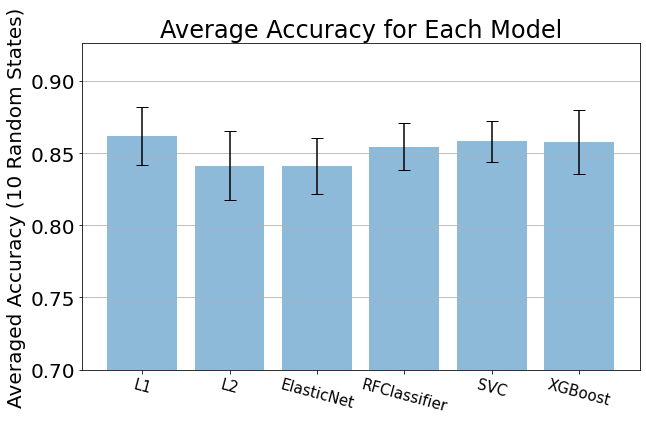

In [210]:
width = 0.35

labels = ["L1", "L2", "ElasticNet", "RFClassifier", "SVC", "XGBoost"]

x_pos = np.arange(len(labels))

CTEs = [ 0.8619565217391305, 0.8413043478260869, 0.8413043478260869, 0.8543478260869566, 0.8581521739130433, 0.8576086956521738]
error = [0.02007194055719499, 0.023913043478260877, 0.01941366423857797, 0.0162680755946693, 0.01447122495184166, 0.021982335234952934]

fig, ax = plt.subplots(figsize=(10,6))


ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=6)

ax.set_ylabel('Averaged Accuracy (10 Random States)')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation = -15, fontsize = 15)
ax.set_title('Average Accuracy for Each Model')
ax.yaxis.grid(True)

ax.set_ylim(0.7)
plt.savefig('/Users/emretoner/Desktop/data1030-final/DATA1030PROJECT-TONER/figures/modelselection1.pdf' )

In [54]:
# now we have chosen LogReg L1 as best model we will investigate further 
nr_state = 10
accuracy_scores = []
y_test_vals = []
all_y_test_vals = []
auc_curve = []
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
pg = ParameterGrid(param_grid)
train_scores = np.zeros(len(pg))
valid_scores = np.zeros(len(pg))
test_scores = np.zeros(len(pg))


pipeline_random3()

there are 2 unique missing value patterns.
working on unique pattern 0
Train Score: 0.5333333333333333:Validation Score: 0.5033112582781457: Test Score: 0.5103448275862069
Train Score: 0.7933333333333333:Validation Score: 0.7483443708609272: Test Score: 0.7310344827586207
Train Score: 0.8755555555555555:Validation Score: 0.8344370860927153: Test Score: 0.8137931034482758
Train Score: 0.8777777777777778:Validation Score: 0.8410596026490066: Test Score: 0.8482758620689655
Train Score: 0.88:Validation Score: 0.8410596026490066: Test Score: 0.8413793103448276
Train Score: 0.88:Validation Score: 0.8410596026490066: Test Score: 0.8413793103448276
Train Score: 0.88:Validation Score: 0.8410596026490066: Test Score: 0.8413793103448276
Best param: {'C': 1}
Test Score with Best Parameter: 0.8482758620689655
working on unique pattern 1
Train Score: 0.4618181818181818:Validation Score: 0.42934782608695654: Test Score: 0.07692307692307693
Train Score: 0.7381818181818182:Validation Score: 0.766304347

there are 2 unique missing value patterns.
working on unique pattern 0
Train Score: 0.5365853658536586:Validation Score: 0.49032258064516127: Test Score: 0.5142857142857142
Train Score: 0.7871396895787139:Validation Score: 0.7612903225806451: Test Score: 0.7428571428571429
Train Score: 0.8603104212860311:Validation Score: 0.832258064516129: Test Score: 0.8642857142857143
Train Score: 0.8713968957871396:Validation Score: 0.8709677419354839: Test Score: 0.8714285714285714
Train Score: 0.8691796008869179:Validation Score: 0.8709677419354839: Test Score: 0.8785714285714286
Train Score: 0.8736141906873615:Validation Score: 0.8709677419354839: Test Score: 0.8785714285714286
Train Score: 0.8736141906873615:Validation Score: 0.8709677419354839: Test Score: 0.8785714285714286
Best param: {'C': 1}
Test Score with Best Parameter: 0.8714285714285714
working on unique pattern 1
Train Score: 0.45636363636363636:Validation Score: 0.42934782608695654: Test Score: 0.18181818181818182
Train Score: 0.732

[0.8478260869565217,
 0.8315217391304348,
 0.842391304347826,
 0.9021739130434783,
 0.8804347826086957,
 0.8478260869565217,
 0.8695652173913043,
 0.8532608695652174,
 0.875,
 0.8695652173913043]

In [107]:
# to create confusion matrix



nr_state = 100
accuracy_scores = []
auc_curve = []
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
pg = ParameterGrid(param_grid)
train_scores = np.zeros(len(pg))
valid_scores = np.zeros(len(pg))
test_scores = np.zeros(len(pg))



def logreg_model_con(X_train1, Y_train1, X_CV1, y_CV1, X_test1, y_test, verbose=1):
    # make into row vectors to avoid an obnoxious sklearn warning
    Y_train1 = np.reshape(np.array(Y_train1), (1, -1)).ravel()
    y_CV1 = np.reshape(np.array(y_CV1), (1, -1)).ravel()
    y_test = np.reshape(np.array(y_test), (1, -1)).ravel()
    
    clf = LogisticRegression(penalty='l1', solver='liblinear', random_state = 42)    # find the best parameter set

    for i in range(len(pg)):
        if verbose >= 5:
            print("Param set " + str(i + 1) + " / " + str(len(pg)))
        params = pg[i]
        clf.set_params(**params)
        clf.fit(X_train1, Y_train1)
        y_CV1_pred = clf.predict(X_CV1)
        y_test_pred = clf.predict(X_test1)
        train_scores[i] = clf.score(X_train1, Y_train1)
        valid_scores[i] = accuracy_score(y_CV1, y_CV1_pred)
        test_scores[i] = accuracy_score(y_test, y_test_pred)
        

    best_params = np.array(pg)[valid_scores == np.max(valid_scores)]
    
    # test the model on the test set with best parameter set
    clf.set_params(**best_params[0])
    clf.fit(X_train1, Y_train1)

    y_test_pred = clf.predict(X_test1)
    param_test = accuracy_score(y_test, y_test_pred)

    return (accuracy_score(y_test,y_test_pred), y_test_pred)

    


# all the inputs need to be pandas DataFrame
def reduced_feature_con(X_train1, Y_train1, X_CV1, y_CV1, X_test1, y_test, feature_names):
    X_train1 = pd.DataFrame(data=X_train1, columns=feature_names)
    X_CV1 = pd.DataFrame(data=X_CV1, columns=feature_names)
    X_test1 = pd.DataFrame(data=X_test1, columns=feature_names)
    Y_train1 = pd.DataFrame(data=Y_train1)
    y_test = pd.Series(y_test)
    # find all unique patterns of missing value in test set
    mask = X_test1.isnull()
    unique_rows = np.array(np.unique(mask, axis=0))
    all_y_test_pred = pd.DataFrame()
    all_y_test = pd.DataFrame()
    

    # divide test sets into subgroups according to the unique patterns
    for i in range(len(unique_rows)):
        ## generate X_test1 subset that matches the unique pattern i
        sub_X_test1 = pd.DataFrame()
        sub_y_test = pd.Series(dtype=int)
        for j in range(len(mask)): # check each row in mask
            row_mask = np.array(mask.iloc[j])
            if np.array_equal(row_mask, unique_rows[i]): # if the pattern matches the ith unique pattern
                sub_X_test1 = sub_X_test1.append(X_test1.iloc[j])# append the according X_test1 row j to the subset
                sub_y_test = sub_y_test.append(y_test.iloc[[j]])# append the according y_test row j
        sub_X_test1 = sub_X_test1[X_test1.columns[~unique_rows[i]]]
        
        ## choose the according reduced features for subgroups
        sub_X_train1 = pd.DataFrame()
        sub_Y_train1 = pd.DataFrame()
        sub_X_CV1 = pd.DataFrame()
        sub_y_CV1 = pd.DataFrame()
        # 1.cut the feature columns that have nans in the according sub_X_test1
        sub_X_train1 = X_train1[X_train1.columns[~unique_rows[i]]]
        sub_X_CV1 = X_CV1[X_CV1.columns[~unique_rows[i]]]
        # 2.cut the rows in the sub_X_train1 and sub_X_CV1 that have any nans
        sub_X_train1 = sub_X_train1.dropna()
        sub_X_CV1 = sub_X_CV1.dropna()   
        # 3.cut the sub_Y_train1 and sub_y_CV1 accordingly
        sub_Y_train1 = Y_train1.iloc[sub_X_train1.index]
        sub_y_CV1 = y_CV1.iloc[sub_X_CV1.index]
        
        
        # run log_reg
        sub_y_test_pred = logreg_model_con(sub_X_train1, sub_Y_train1, sub_X_CV1, 
                                       sub_y_CV1, sub_X_test1, sub_y_test, verbose=2)
        sub_y_test_pred = pd.DataFrame(sub_y_test_pred[1],columns=['sub_y_test_pred'],
                                          index=sub_y_test.index)
        # collect the test predictions
        all_y_test_pred = all_y_test_pred.append(sub_y_test_pred)
    # rank the final y_test_pred according to original y_test index
    all_y_test_pred = all_y_test_pred.sort_index()
    y_test = y_test.sort_index()
    # get global RMSE
    total_accuracy =  accuracy_score(y_test,all_y_test_pred)
    ROC = roc_auc_score(y_test,all_y_test_pred)
    return total_accuracy, y_test, all_y_test_pred, ROC

def pipeline_random_con():
    y_test_vals = []
    all_y_test_vals = []
    for i in range(nr_state):
        X_other, X_test1, y_other, y_test = train_test_split(df_new, y, test_size=0.2, random_state=15*i)
        X_train1, X_CV1, Y_train1, y_CV1 = train_test_split(X_other, y_other, test_size=0.25, random_state=15*i)
        preprocessor = ColumnTransformer(transformers=[
                        ('std', standard_transformer, std_ftrs),
                        ('onehot', onehot_transformer, onehot_ftrs),
                        ('ordinal', ordinal_transformer, ordinal_ftrs)])

        X_prep = preprocessor.fit_transform(X_train1)
    

        feature_names = preprocessor.transformers_[0][-1] + \
                        preprocessor.named_transformers_['onehot'][0].get_feature_names(onehot_ftrs).tolist() + \
                preprocessor.transformers_[2][-1]
        df_train = pd.DataFrame(data=X_prep,columns=feature_names)
#         print(df_train.shape)

        # transform the CV
        df_CV = preprocessor.transform(X_CV1)
        df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
#         print(df_CV.shape)

        # transform the test
        df_test = preprocessor.transform(X_test1)
        df_test = pd.DataFrame(data=df_test,columns = feature_names)
#         print(df_test.shape)
        yv = reduced_feature_con(df_train, Y_train1, df_CV, y_CV1, df_test, y_test, feature_names)[1]
        y_test_vals.append(yv)
        at = reduced_feature_con(df_train, Y_train1, df_CV, y_CV1, df_test, y_test, feature_names)[2]
        all_y_test_vals.append(at)
#         roc = reduced_feature3(df_train, Y_train1, df_CV, y_CV1, df_test, y_test, feature_names)[3]
#         auc_curve.append(roc)
        
    return y_test_vals, all_y_test_vals


In [155]:
ys = pipeline_random_con()[0]
preds = pipeline_random_con()[1]

confusion_y = np.array(ys).ravel()
confusion_y_pred = np.array(preds).ravel()
print(len(confusion_y))
print(len(confusion_y_pred))
C = confusion_matrix(confusion_y,confusion_y_pred) 

tpr = C[1,1]/(C[1,0]+C[1,1])
fpr = C[0,1]/(C[0,0]+C[0,1])

18400
18400


In [228]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix Averaged over 100 Random States'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    ax.set_title('Normalized confusion matrix Averaged over 100 Random States', fontsize = 15)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

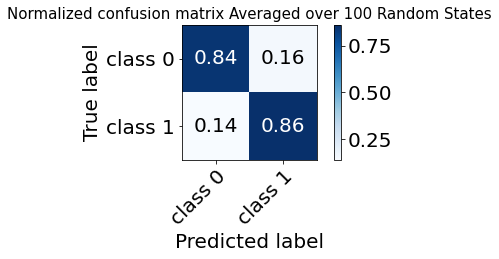

In [229]:
plot_confusion_matrix(confusion_y,confusion_y_pred,classes=['class 0','class 1'],normalize=True)
plt.savefig('/Users/emretoner/Desktop/data1030-final/DATA1030PROJECT-TONER/figures/confusionmatrix.pdf', bbox_inches = "tight")
plt.show()


In [105]:
# to create a baseline model

nr_state = 1

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
pg = ParameterGrid(param_grid)
train_scores = np.zeros(len(pg))
valid_scores = np.zeros(len(pg))
test_scores = np.zeros(len(pg))



def logreg_model_baseline(X_train1, Y_train1, X_CV1, y_CV1, X_test1, y_test, verbose=1):
    # make into row vectors to avoid an obnoxious sklearn warning
    Y_train1 = np.reshape(np.array(Y_train1), (1, -1)).ravel()
    y_CV1 = np.reshape(np.array(y_CV1), (1, -1)).ravel()
    y_test = np.reshape(np.array(y_test), (1, -1)).ravel()
    
    clf = LogisticRegression(penalty='l1', solver='liblinear', random_state = 42)    # find the best parameter set

    for i in range(len(pg)):
        if verbose >= 5:
            print("Param set " + str(i + 1) + " / " + str(len(pg)))
        params = pg[i]
        clf.set_params(**params)
        clf.fit(X_train1, Y_train1)
        y_CV1_pred = clf.predict(X_CV1)
        y_test_pred = clf.predict(X_test1)
        train_scores[i] = clf.score(X_train1, Y_train1)
        valid_scores[i] = accuracy_score(y_CV1, y_CV1_pred)
        test_scores[i] = accuracy_score(y_test, y_test_pred)
        

    best_params = np.array(pg)[valid_scores == np.max(valid_scores)]
    
    # test the model on the test set with best parameter set
    clf.set_params(**best_params[0])
    clf.fit(X_train1, Y_train1)

    y_test_pred = clf.predict(X_test1)
    param_test = accuracy_score(y_test, y_test_pred)

    return (accuracy_score(y_test,y_test_pred), y_test_pred)

    


# all the inputs need to be pandas DataFrame
def reduced_feature_baseline(X_train1, Y_train1, X_CV1, y_CV1, X_test1, y_test, feature_names):
    X_train1 = pd.DataFrame(data=X_train1, columns=feature_names)
    X_CV1 = pd.DataFrame(data=X_CV1, columns=feature_names)
    X_test1 = pd.DataFrame(data=X_test1, columns=feature_names)
    Y_train1 = pd.DataFrame(data=Y_train1)
    y_test = pd.Series(y_test)
    # find all unique patterns of missing value in test set
    mask = X_test1.isnull()
    unique_rows = np.array(np.unique(mask, axis=0))
    all_y_test_pred = pd.DataFrame()
    all_y_test = pd.DataFrame()
    

    # divide test sets into subgroups according to the unique patterns
    for i in range(len(unique_rows)):
        ## generate X_test1 subset that matches the unique pattern i
        sub_X_test1 = pd.DataFrame()
        sub_y_test = pd.Series(dtype=int)
        for j in range(len(mask)): # check each row in mask
            row_mask = np.array(mask.iloc[j])
            if np.array_equal(row_mask, unique_rows[i]): # if the pattern matches the ith unique pattern
                sub_X_test1 = sub_X_test1.append(X_test1.iloc[j])# append the according X_test1 row j to the subset
                sub_y_test = sub_y_test.append(y_test.iloc[[j]])# append the according y_test row j
        sub_X_test1 = sub_X_test1[X_test1.columns[~unique_rows[i]]]
        
        ## choose the according reduced features for subgroups
        sub_X_train1 = pd.DataFrame()
        sub_Y_train1 = pd.DataFrame()
        sub_X_CV1 = pd.DataFrame()
        sub_y_CV1 = pd.DataFrame()
        # 1.cut the feature columns that have nans in the according sub_X_test1
        sub_X_train1 = X_train1[X_train1.columns[~unique_rows[i]]]
        sub_X_CV1 = X_CV1[X_CV1.columns[~unique_rows[i]]]
        # 2.cut the rows in the sub_X_train1 and sub_X_CV1 that have any nans
        sub_X_train1 = sub_X_train1.dropna()
        sub_X_CV1 = sub_X_CV1.dropna()   
        # 3.cut the sub_Y_train1 and sub_y_CV1 accordingly
        sub_Y_train1 = Y_train1.iloc[sub_X_train1.index]
        sub_y_CV1 = y_CV1.iloc[sub_X_CV1.index]
        
        
        # run log_reg
        sub_y_test_pred = logreg_model_baseline(sub_X_train1, sub_Y_train1, sub_X_CV1, 
                                       sub_y_CV1, sub_X_test1, sub_y_test, verbose=2)
        sub_y_test_pred = pd.DataFrame(sub_y_test_pred[1],columns=['sub_y_test_pred'],
                                          index=sub_y_test.index)
        # collect the test predictions
    all_y_test_pred = np.ones(len(y_test))
    # rank the final y_test_pred according to original y_test index
    y_test = y_test.sort_index()
    # get global RMSE
    total_accuracy =  accuracy_score(y_test,all_y_test_pred)
    ROC = roc_auc_score(y_test,all_y_test_pred)
    return total_accuracy, y_test, all_y_test_pred, ROC

def pipeline_random_baseline():
    accuracy_scores = []
    for i in range(nr_state):
        X_other, X_test1, y_other, y_test = train_test_split(df_new, y, test_size=0.2, random_state=15*i)
        X_train1, X_CV1, Y_train1, y_CV1 = train_test_split(X_other, y_other, test_size=0.25, random_state=15*i)
        preprocessor = ColumnTransformer(transformers=[
                        ('std', standard_transformer, std_ftrs),
                        ('onehot', onehot_transformer, onehot_ftrs),
                        ('ordinal', ordinal_transformer, ordinal_ftrs)])

        X_prep = preprocessor.fit_transform(X_train1)
    

        feature_names = preprocessor.transformers_[0][-1] + \
                        preprocessor.named_transformers_['onehot'][0].get_feature_names(onehot_ftrs).tolist() + \
                preprocessor.transformers_[2][-1]
        df_train = pd.DataFrame(data=X_prep,columns=feature_names)
#         print(df_train.shape)

        # transform the CV
        df_CV = preprocessor.transform(X_CV1)
        df_CV = pd.DataFrame(data=df_CV,columns = feature_names)
#         print(df_CV.shape)

        # transform the test
        df_test = preprocessor.transform(X_test1)
        df_test = pd.DataFrame(data=df_test,columns = feature_names)
        rf = reduced_feature_baseline(df_train, y_train, df_CV, y_CV, df_test, y_test, feature_names)[0]
        accuracy_scores.append(rf)
#         print(df_test.shape)
#         yv = reduced_feature_baseline(df_train, Y_train1, df_CV, y_CV1, df_test, y_test, feature_names)[1]
#         y_test_vals.append(yv)
#         at = reduced_feature_baseline(df_train, Y_train1, df_CV, y_CV1, df_test, y_test, feature_names)[2]
#         all_y_test_vals.append(at)
# #         roc = reduced_feature3(df_train, Y_train1, df_CV, y_CV1, df_test, y_test, feature_names)[3]
# #         auc_curve.append(roc)
        
    return accuracy_scores

average_accuracy = np.mean(np.array(pipeline_random_baseline()))
print("Accuracy", average_accuracy)
std_accuracy = np.std(np.array(pipeline_random_baseline()))
print("SD", std_accuracy)

Accuracy 0.5815217391304348
SD 0.0


In [234]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer


def ML_pipeline_kfold(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    
    std_ftrs = ['Cholesterol', 'RestingBP','MaxHR', 'Oldpeak', 'Age']
    onehot_ftrs = ['Sex', 'FastingBS', 'ST_Slope', 'ExerciseAngina', 'RestingECG']
    ordinal_ftrs = ['ChestPainType']
    ordinal_cats = [['ASY', 'NAP', 'ATA', 'TA']]
    

       # one-hot encoder
    onehot_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

    # ordinal encoder
    ordinal_transformer = Pipeline(steps=[
        ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

    # standard scaler
    standard_transformer = Pipeline(steps=[
        ('imputer2', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])


    preprocessor = ColumnTransformer(transformers=[
            ('std', standard_transformer, std_ftrs),
            ('onehot', onehot_transformer, onehot_ftrs),
            ('ordinal', ordinal_transformer, ordinal_ftrs)])
    final_scaler = StandardScaler()

    pipe = make_pipeline(preprocessor,final_scaler, LogisticRegression(penalty='l1',solver='liblinear',max_iter=10000000))


# clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

    
    # the parameter(s) we want to tune
    param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, return_train_score = True,n_jobs=-1)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    feature_names = std_ftrs + \
                grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs).tolist() + \
    ordinal_ftrs

    return grid, np.array(feature_names), X_test, y_test

test score: 0.8532608695652174
[ 0.03180569  0.         -0.22035833  0.46996851  0.15870452 -0.00905852
  0.58828827 -0.51201614  0.          0.          0.54561923 -0.59371262
 -0.22910665  0.2729742   0.00823464  0.         -0.0425912  -0.5934362 ]


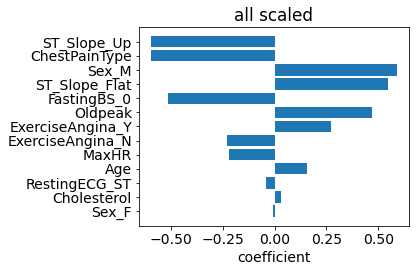

In [235]:
grid, feature_names, X_test, y_test = ML_pipeline_kfold(df_new,y,42,4)
print('test score:',grid.score(X_test,y_test))
coefs = grid.best_estimator_[-1].coef_[0]
print(coefs)
sorted_indcs = np.argsort(np.abs(coefs))

plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(13),coefs[sorted_indcs[-13:]])
plt.yticks(np.arange(13),feature_names[sorted_indcs[-13:]])
plt.xlabel('coefficient')
plt.title('all scaled')
plt.tight_layout()
plt.savefig('/Users/emretoner/Desktop/data1030-final/DATA1030PROJECT-TONER/figures/COEFFICIENTS.pdf' )
plt.show()


In [188]:
# SHAP PIPELINE

random_state = 42
def ML_pipeline_kfold1(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    # splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    # create the pipeline: preprocessor + supervised ML method
    
    std_ftrs = ['Cholesterol', 'RestingBP','MaxHR', 'Oldpeak', 'Age']
    onehot_ftrs = ['Sex', 'FastingBS', 'ST_Slope', 'ExerciseAngina', 'RestingECG']
    ordinal_ftrs = ['ChestPainType']
    ordinal_cats = [['ASY', 'NAP', 'ATA', 'TA']]
    

       # one-hot encoder
    onehot_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

    # ordinal encoder
    ordinal_transformer = Pipeline(steps=[
        ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

    # standard scaler
    standard_transformer = Pipeline(steps=[
        ('imputer2', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])


    preprocessor = ColumnTransformer(transformers=[
            ('std', standard_transformer, std_ftrs),
            ('onehot', onehot_transformer, onehot_ftrs),
            ('ordinal', ordinal_transformer, ordinal_ftrs)])

    pipe = make_pipeline(preprocessor, RandomForestClassifier(n_estimators =  100,random_state=random_state))


    param_grid = {'randomforestclassifier__max_depth': [10,30,100,300],
                  'randomforestclassifier__min_samples_split': [16, 32, 64, 128]}
    
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,cv=kf, return_train_score = True,n_jobs=-1)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    feature_names = std_ftrs + \
                grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs).tolist() + \
    ordinal_ftrs

    return grid, np.array(feature_names), X_test, y_test

In [189]:
grid, feature_names, X_test, y_test = ML_pipeline_kfold1(df_new,y,42,4)


In [193]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid.best_estimator_[1])
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values))

(184, 18)
(2, 184, 18)


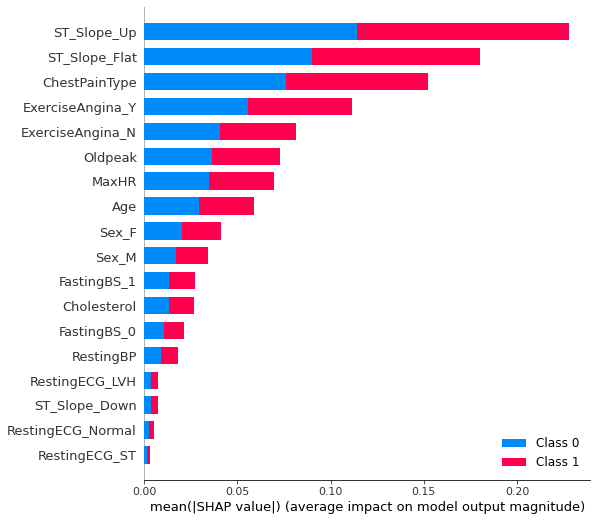

In [241]:
shap.summary_plot(shap_values, X_test_transformed[:1000],feature_names = feature_names, show=False)
plt.savefig('/Users/emretoner/Desktop/data1030-final/DATA1030PROJECT-TONER/figures/shapsummary2.pdf' )


In [240]:
index = 1 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names, show=False)
plt.savefig('/Users/emretoner/Desktop/data1030-final/DATA1030PROJECT-TONER/figures/shapsummary2.pdf' )


0.4506811989100817


<Figure size 432x288 with 0 Axes>

In [165]:
grid, features, X_test, y_test = ML_pipeline_kfold(df_new,y,42,4)
np.random.seed(42)

ftr_names = df_new.columns
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

test_score = grid.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == 1)/len(y_test))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.8532608695652174
test baseline =  0.5815217391304348
shuffling Cholesterol
   shuffled test score: 0.853 +/- 0.0
shuffling Age
   shuffled test score: 0.853 +/- 0.008
shuffling Sex
   shuffled test score: 0.835 +/- 0.011
shuffling ChestPainType
   shuffled test score: 0.807 +/- 0.015
shuffling RestingBP
   shuffled test score: 0.853 +/- 0.0
shuffling FastingBS
   shuffled test score: 0.819 +/- 0.012
shuffling RestingECG
   shuffled test score: 0.857 +/- 0.003
shuffling MaxHR
   shuffled test score: 0.843 +/- 0.003
shuffling ExerciseAngina
   shuffled test score: 0.842 +/- 0.013
shuffling Oldpeak
   shuffled test score: 0.85 +/- 0.01
shuffling ST_Slope
   shuffled test score: 0.754 +/- 0.024


In [164]:
ftr_names = df_new.columns
ftr_names

Index(['Cholesterol', 'Age', 'Sex', 'ChestPainType', 'RestingBP', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

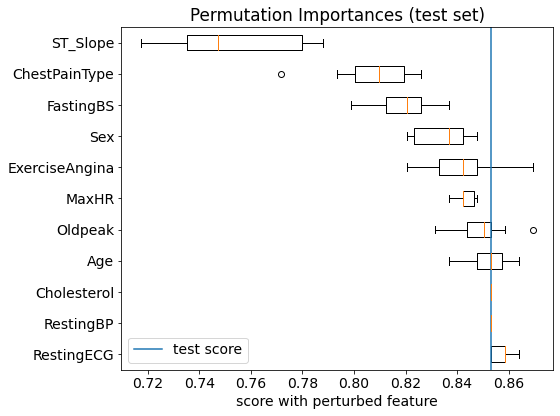

In [236]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('/Users/emretoner/Desktop/data1030-final/DATA1030PROJECT-TONER/figures/permutationimportances.pdf' )
plt.show()

In [195]:
index = 100 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names)


0.4506811989100817
